In [10]:
import os
import math
import torch
from transformers import DistilBertForMaskedLM, DistilBertTokenizer, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Set device for model training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model and tokenizer initialization for DistilBERT
model_name = "distilbert-base-uncased"
model = DistilBertForMaskedLM.from_pretrained(model_name)
model.to(device)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

# Load and prepare dataset
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]

# Tokenize datasets
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Data collator for MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

# Set training arguments
training_args = TrainingArguments(
    output_dir="./mlm-model",
    eval_strategy="epoch",
    per_device_train_batch_size=8,
    num_train_epochs=3,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=100,
    report_to="none",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_eval_dataset
)

# Start training and evaluation
trainer.train()

  1%|          | 103/13770 [00:05<10:48, 21.08it/s]

{'loss': 2.2982, 'grad_norm': 14.850616455078125, 'learning_rate': 4.963689179375454e-05, 'epoch': 0.02}


  1%|▏         | 202/13770 [00:10<11:15, 20.08it/s]

{'loss': 2.3401, 'grad_norm': 25.033540725708008, 'learning_rate': 4.927378358750908e-05, 'epoch': 0.04}


  2%|▏         | 304/13770 [00:14<11:02, 20.32it/s]

{'loss': 2.282, 'grad_norm': 12.466690063476562, 'learning_rate': 4.891067538126362e-05, 'epoch': 0.07}


  3%|▎         | 403/13770 [00:19<10:43, 20.78it/s]

{'loss': 2.1813, 'grad_norm': 13.718042373657227, 'learning_rate': 4.854756717501816e-05, 'epoch': 0.09}


  4%|▎         | 502/13770 [00:24<10:48, 20.47it/s]

{'loss': 2.331, 'grad_norm': 62.58803939819336, 'learning_rate': 4.8184458968772694e-05, 'epoch': 0.11}


  4%|▍         | 604/13770 [00:29<10:23, 21.13it/s]

{'loss': 2.2442, 'grad_norm': 21.7285099029541, 'learning_rate': 4.7821350762527234e-05, 'epoch': 0.13}


  5%|▌         | 703/13770 [00:34<10:21, 21.04it/s]

{'loss': 2.1442, 'grad_norm': 17.097700119018555, 'learning_rate': 4.7458242556281774e-05, 'epoch': 0.15}


  6%|▌         | 802/13770 [00:38<10:19, 20.93it/s]

{'loss': 2.2521, 'grad_norm': 23.338483810424805, 'learning_rate': 4.709513435003631e-05, 'epoch': 0.17}


  7%|▋         | 903/13770 [00:43<10:03, 21.33it/s]

{'loss': 2.1816, 'grad_norm': 16.683443069458008, 'learning_rate': 4.673202614379085e-05, 'epoch': 0.2}


  7%|▋         | 1002/13770 [00:48<09:58, 21.32it/s]

{'loss': 2.1979, 'grad_norm': 15.539514541625977, 'learning_rate': 4.636891793754539e-05, 'epoch': 0.22}


  8%|▊         | 1104/13770 [00:53<09:59, 21.12it/s]

{'loss': 2.2372, 'grad_norm': 16.137439727783203, 'learning_rate': 4.600580973129993e-05, 'epoch': 0.24}


  9%|▊         | 1203/13770 [00:58<09:59, 20.97it/s]

{'loss': 2.1285, 'grad_norm': 15.259148597717285, 'learning_rate': 4.564270152505447e-05, 'epoch': 0.26}


  9%|▉         | 1302/13770 [01:02<09:52, 21.04it/s]

{'loss': 2.2277, 'grad_norm': 17.42592430114746, 'learning_rate': 4.5279593318809005e-05, 'epoch': 0.28}


 10%|█         | 1404/13770 [01:07<09:48, 21.00it/s]

{'loss': 2.2129, 'grad_norm': 12.978410720825195, 'learning_rate': 4.4916485112563545e-05, 'epoch': 0.31}


 11%|█         | 1503/13770 [01:12<09:39, 21.15it/s]

{'loss': 2.0939, 'grad_norm': 12.487690925598145, 'learning_rate': 4.4553376906318085e-05, 'epoch': 0.33}


 12%|█▏        | 1602/13770 [01:16<09:30, 21.32it/s]

{'loss': 2.264, 'grad_norm': 19.41948699951172, 'learning_rate': 4.4190268700072624e-05, 'epoch': 0.35}


 12%|█▏        | 1704/13770 [01:21<09:30, 21.16it/s]

{'loss': 2.2149, 'grad_norm': 15.840167045593262, 'learning_rate': 4.3827160493827164e-05, 'epoch': 0.37}


 13%|█▎        | 1803/13770 [01:26<09:29, 21.02it/s]

{'loss': 2.2073, 'grad_norm': 15.393665313720703, 'learning_rate': 4.3464052287581704e-05, 'epoch': 0.39}


 14%|█▍        | 1902/13770 [01:31<09:23, 21.06it/s]

{'loss': 2.1424, 'grad_norm': 14.015935897827148, 'learning_rate': 4.3100944081336244e-05, 'epoch': 0.41}


 15%|█▍        | 2004/13770 [01:35<09:25, 20.82it/s]

{'loss': 2.2008, 'grad_norm': 23.83802604675293, 'learning_rate': 4.273783587509078e-05, 'epoch': 0.44}


 15%|█▌        | 2103/13770 [01:40<09:11, 21.14it/s]

{'loss': 2.3733, 'grad_norm': 17.331892013549805, 'learning_rate': 4.2374727668845316e-05, 'epoch': 0.46}


 16%|█▌        | 2202/13770 [01:45<09:05, 21.22it/s]

{'loss': 2.1843, 'grad_norm': 0.9463510513305664, 'learning_rate': 4.2011619462599856e-05, 'epoch': 0.48}


 17%|█▋        | 2304/13770 [01:50<09:02, 21.15it/s]

{'loss': 2.3082, 'grad_norm': 10.640469551086426, 'learning_rate': 4.1648511256354396e-05, 'epoch': 0.5}


 17%|█▋        | 2403/13770 [01:54<08:58, 21.11it/s]

{'loss': 2.1097, 'grad_norm': 22.084054946899414, 'learning_rate': 4.1285403050108935e-05, 'epoch': 0.52}


 18%|█▊        | 2502/13770 [01:59<08:51, 21.19it/s]

{'loss': 2.2302, 'grad_norm': 13.667298316955566, 'learning_rate': 4.0922294843863475e-05, 'epoch': 0.54}


 19%|█▉        | 2604/13770 [02:04<08:46, 21.19it/s]

{'loss': 2.1453, 'grad_norm': 18.389320373535156, 'learning_rate': 4.0559186637618015e-05, 'epoch': 0.57}


 20%|█▉        | 2703/13770 [02:08<08:44, 21.11it/s]

{'loss': 2.1956, 'grad_norm': 10.987357139587402, 'learning_rate': 4.0196078431372555e-05, 'epoch': 0.59}


 20%|██        | 2802/13770 [02:13<08:42, 21.01it/s]

{'loss': 2.2784, 'grad_norm': 13.481149673461914, 'learning_rate': 3.9832970225127094e-05, 'epoch': 0.61}


 21%|██        | 2904/13770 [02:18<08:32, 21.22it/s]

{'loss': 2.1776, 'grad_norm': 18.52874755859375, 'learning_rate': 3.946986201888163e-05, 'epoch': 0.63}


 22%|██▏       | 3003/13770 [02:23<08:33, 20.95it/s]

{'loss': 2.2525, 'grad_norm': 11.741546630859375, 'learning_rate': 3.910675381263617e-05, 'epoch': 0.65}


 23%|██▎       | 3102/13770 [02:27<08:27, 21.02it/s]

{'loss': 2.1742, 'grad_norm': 14.751676559448242, 'learning_rate': 3.874364560639071e-05, 'epoch': 0.68}


 23%|██▎       | 3204/13770 [02:32<08:20, 21.13it/s]

{'loss': 2.2833, 'grad_norm': 16.64449119567871, 'learning_rate': 3.8380537400145246e-05, 'epoch': 0.7}


 24%|██▍       | 3303/13770 [02:37<08:26, 20.66it/s]

{'loss': 2.1875, 'grad_norm': 12.712928771972656, 'learning_rate': 3.8017429193899786e-05, 'epoch': 0.72}


 25%|██▍       | 3402/13770 [02:42<08:12, 21.03it/s]

{'loss': 2.1328, 'grad_norm': 14.968624114990234, 'learning_rate': 3.7654320987654326e-05, 'epoch': 0.74}


 25%|██▌       | 3504/13770 [02:46<08:01, 21.32it/s]

{'loss': 2.2076, 'grad_norm': 28.816387176513672, 'learning_rate': 3.7291212781408866e-05, 'epoch': 0.76}


 26%|██▌       | 3603/13770 [02:51<07:59, 21.21it/s]

{'loss': 2.178, 'grad_norm': 14.196706771850586, 'learning_rate': 3.6928104575163405e-05, 'epoch': 0.78}


 27%|██▋       | 3702/13770 [02:56<07:56, 21.14it/s]

{'loss': 2.3157, 'grad_norm': 18.3133602142334, 'learning_rate': 3.6564996368917945e-05, 'epoch': 0.81}


 28%|██▊       | 3804/13770 [03:01<07:50, 21.17it/s]

{'loss': 2.0779, 'grad_norm': 11.904163360595703, 'learning_rate': 3.620188816267248e-05, 'epoch': 0.83}


 28%|██▊       | 3903/13770 [03:05<07:46, 21.15it/s]

{'loss': 2.2607, 'grad_norm': 14.632052421569824, 'learning_rate': 3.583877995642702e-05, 'epoch': 0.85}


 29%|██▉       | 4002/13770 [03:10<07:40, 21.23it/s]

{'loss': 2.1245, 'grad_norm': 13.605351448059082, 'learning_rate': 3.547567175018156e-05, 'epoch': 0.87}


 30%|██▉       | 4104/13770 [03:15<07:35, 21.21it/s]

{'loss': 2.2226, 'grad_norm': 14.442821502685547, 'learning_rate': 3.51125635439361e-05, 'epoch': 0.89}


 31%|███       | 4203/13770 [03:19<07:32, 21.16it/s]

{'loss': 2.0824, 'grad_norm': 19.731464385986328, 'learning_rate': 3.474945533769064e-05, 'epoch': 0.92}


 31%|███       | 4302/13770 [03:24<07:31, 20.98it/s]

{'loss': 2.2787, 'grad_norm': 16.401641845703125, 'learning_rate': 3.4386347131445177e-05, 'epoch': 0.94}


 32%|███▏      | 4404/13770 [03:29<07:20, 21.26it/s]

{'loss': 2.1727, 'grad_norm': 13.754307746887207, 'learning_rate': 3.4023238925199716e-05, 'epoch': 0.96}


 33%|███▎      | 4503/13770 [03:33<07:16, 21.22it/s]

{'loss': 2.0815, 'grad_norm': 19.716432571411133, 'learning_rate': 3.366013071895425e-05, 'epoch': 0.98}


                                                    
 33%|███▎      | 4593/13770 [03:44<1:37:02,  1.58it/s]

{'eval_loss': nan, 'eval_runtime': 5.8836, 'eval_samples_per_second': 639.06, 'eval_steps_per_second': 79.882, 'epoch': 1.0}


 33%|███▎      | 4602/13770 [03:44<38:02,  4.02it/s]  

{'loss': 2.0622, 'grad_norm': 13.858064651489258, 'learning_rate': 3.329702251270879e-05, 'epoch': 1.0}


 34%|███▍      | 4704/13770 [03:49<07:11, 21.02it/s]

{'loss': 2.0397, 'grad_norm': 24.681549072265625, 'learning_rate': 3.293391430646333e-05, 'epoch': 1.02}


 35%|███▍      | 4803/13770 [03:54<07:06, 21.03it/s]

{'loss': 2.1342, 'grad_norm': 10.975521087646484, 'learning_rate': 3.257080610021787e-05, 'epoch': 1.05}


 36%|███▌      | 4902/13770 [03:58<07:03, 20.93it/s]

{'loss': 1.9854, 'grad_norm': 17.912738800048828, 'learning_rate': 3.220769789397241e-05, 'epoch': 1.07}


 36%|███▋      | 5004/13770 [04:03<07:03, 20.70it/s]

{'loss': 1.8991, 'grad_norm': 15.983198165893555, 'learning_rate': 3.184458968772695e-05, 'epoch': 1.09}


 37%|███▋      | 5103/13770 [04:08<07:00, 20.60it/s]

{'loss': 2.0076, 'grad_norm': 16.023517608642578, 'learning_rate': 3.148148148148148e-05, 'epoch': 1.11}


 38%|███▊      | 5202/13770 [04:13<06:57, 20.53it/s]

{'loss': 2.0552, 'grad_norm': 15.648089408874512, 'learning_rate': 3.111837327523602e-05, 'epoch': 1.13}


 39%|███▊      | 5304/13770 [04:18<06:49, 20.69it/s]

{'loss': 2.0719, 'grad_norm': 14.352956771850586, 'learning_rate': 3.075526506899056e-05, 'epoch': 1.15}


 39%|███▉      | 5403/13770 [04:22<06:47, 20.52it/s]

{'loss': 2.052, 'grad_norm': 15.968374252319336, 'learning_rate': 3.0392156862745097e-05, 'epoch': 1.18}


 40%|███▉      | 5502/13770 [04:27<06:46, 20.36it/s]

{'loss': 2.0379, 'grad_norm': 13.033754348754883, 'learning_rate': 3.0029048656499636e-05, 'epoch': 1.2}


 41%|████      | 5604/13770 [04:32<06:32, 20.80it/s]

{'loss': 2.1083, 'grad_norm': 13.87342643737793, 'learning_rate': 2.9665940450254176e-05, 'epoch': 1.22}


 41%|████▏     | 5703/13770 [04:37<06:26, 20.89it/s]

{'loss': 2.0097, 'grad_norm': 13.464568138122559, 'learning_rate': 2.9302832244008716e-05, 'epoch': 1.24}


 42%|████▏     | 5802/13770 [04:42<06:15, 21.24it/s]

{'loss': 2.0102, 'grad_norm': 11.745650291442871, 'learning_rate': 2.8939724037763255e-05, 'epoch': 1.26}


 43%|████▎     | 5904/13770 [04:47<06:10, 21.26it/s]

{'loss': 1.9923, 'grad_norm': 17.380537033081055, 'learning_rate': 2.8576615831517795e-05, 'epoch': 1.29}


 44%|████▎     | 6003/13770 [04:51<06:09, 21.03it/s]

{'loss': 2.0689, 'grad_norm': 20.034372329711914, 'learning_rate': 2.8213507625272335e-05, 'epoch': 1.31}


 44%|████▍     | 6102/13770 [04:56<06:03, 21.08it/s]

{'loss': 2.0411, 'grad_norm': 16.983449935913086, 'learning_rate': 2.7850399419026875e-05, 'epoch': 1.33}


 45%|████▌     | 6204/13770 [05:01<06:01, 20.92it/s]

{'loss': 1.9568, 'grad_norm': 17.889747619628906, 'learning_rate': 2.7487291212781407e-05, 'epoch': 1.35}


 46%|████▌     | 6303/13770 [05:05<05:51, 21.24it/s]

{'loss': 2.0509, 'grad_norm': 19.213233947753906, 'learning_rate': 2.7124183006535947e-05, 'epoch': 1.37}


 46%|████▋     | 6402/13770 [05:10<05:48, 21.13it/s]

{'loss': 2.0458, 'grad_norm': 10.814879417419434, 'learning_rate': 2.6761074800290487e-05, 'epoch': 1.39}


 47%|████▋     | 6504/13770 [05:15<05:52, 20.59it/s]

{'loss': 2.0015, 'grad_norm': 17.778640747070312, 'learning_rate': 2.6397966594045027e-05, 'epoch': 1.42}


 48%|████▊     | 6603/13770 [05:20<05:42, 20.90it/s]

{'loss': 2.0195, 'grad_norm': 16.494457244873047, 'learning_rate': 2.6034858387799566e-05, 'epoch': 1.44}


 49%|████▊     | 6702/13770 [05:25<05:35, 21.09it/s]

{'loss': 2.0559, 'grad_norm': 11.704830169677734, 'learning_rate': 2.5671750181554106e-05, 'epoch': 1.46}


 49%|████▉     | 6804/13770 [05:29<05:40, 20.44it/s]

{'loss': 2.0898, 'grad_norm': 36.26105499267578, 'learning_rate': 2.5308641975308646e-05, 'epoch': 1.48}


 50%|█████     | 6903/13770 [05:34<05:31, 20.74it/s]

{'loss': 2.0393, 'grad_norm': 15.083394050598145, 'learning_rate': 2.4945533769063182e-05, 'epoch': 1.5}


 51%|█████     | 7002/13770 [05:39<05:31, 20.41it/s]

{'loss': 1.9398, 'grad_norm': 24.53336524963379, 'learning_rate': 2.4582425562817722e-05, 'epoch': 1.53}


 52%|█████▏    | 7104/13770 [05:44<05:23, 20.59it/s]

{'loss': 1.9462, 'grad_norm': 19.945344924926758, 'learning_rate': 2.421931735657226e-05, 'epoch': 1.55}


 52%|█████▏    | 7203/13770 [05:49<05:20, 20.49it/s]

{'loss': 2.0516, 'grad_norm': 13.210506439208984, 'learning_rate': 2.38562091503268e-05, 'epoch': 1.57}


 53%|█████▎    | 7302/13770 [05:54<05:13, 20.63it/s]

{'loss': 1.9875, 'grad_norm': 13.604063034057617, 'learning_rate': 2.3493100944081338e-05, 'epoch': 1.59}


 54%|█████▍    | 7404/13770 [05:59<05:14, 20.22it/s]

{'loss': 2.0488, 'grad_norm': 15.745477676391602, 'learning_rate': 2.3129992737835877e-05, 'epoch': 1.61}


 54%|█████▍    | 7503/13770 [06:03<05:03, 20.62it/s]

{'loss': 1.8871, 'grad_norm': 10.814849853515625, 'learning_rate': 2.2766884531590417e-05, 'epoch': 1.63}


 55%|█████▌    | 7602/13770 [06:08<04:59, 20.57it/s]

{'loss': 1.9517, 'grad_norm': 10.484314918518066, 'learning_rate': 2.2403776325344953e-05, 'epoch': 1.66}


 56%|█████▌    | 7704/13770 [06:13<04:54, 20.60it/s]

{'loss': 1.9817, 'grad_norm': 14.979470252990723, 'learning_rate': 2.2040668119099493e-05, 'epoch': 1.68}


 57%|█████▋    | 7803/13770 [06:18<04:48, 20.68it/s]

{'loss': 1.9505, 'grad_norm': 15.495769500732422, 'learning_rate': 2.1677559912854033e-05, 'epoch': 1.7}


 57%|█████▋    | 7902/13770 [06:23<04:44, 20.64it/s]

{'loss': 2.0289, 'grad_norm': 57.43933868408203, 'learning_rate': 2.131445170660857e-05, 'epoch': 1.72}


 58%|█████▊    | 8004/13770 [06:28<04:39, 20.64it/s]

{'loss': 2.0424, 'grad_norm': 12.639421463012695, 'learning_rate': 2.095134350036311e-05, 'epoch': 1.74}


 59%|█████▉    | 8103/13770 [06:32<04:36, 20.46it/s]

{'loss': 2.154, 'grad_norm': 20.06006622314453, 'learning_rate': 2.058823529411765e-05, 'epoch': 1.76}


 60%|█████▉    | 8202/13770 [06:37<04:30, 20.61it/s]

{'loss': 2.0392, 'grad_norm': 21.15023422241211, 'learning_rate': 2.0225127087872185e-05, 'epoch': 1.79}


 60%|██████    | 8304/13770 [06:42<04:18, 21.17it/s]

{'loss': 1.965, 'grad_norm': 14.482659339904785, 'learning_rate': 1.9862018881626725e-05, 'epoch': 1.81}


 61%|██████    | 8403/13770 [06:47<04:16, 20.95it/s]

{'loss': 2.0142, 'grad_norm': 15.919151306152344, 'learning_rate': 1.9498910675381264e-05, 'epoch': 1.83}


 62%|██████▏   | 8502/13770 [06:52<04:10, 21.01it/s]

{'loss': 1.8863, 'grad_norm': 17.64275360107422, 'learning_rate': 1.91358024691358e-05, 'epoch': 1.85}


 62%|██████▏   | 8604/13770 [06:56<04:03, 21.20it/s]

{'loss': 1.9851, 'grad_norm': 12.386394500732422, 'learning_rate': 1.877269426289034e-05, 'epoch': 1.87}


 63%|██████▎   | 8703/13770 [07:01<04:07, 20.46it/s]

{'loss': 1.952, 'grad_norm': 15.256610870361328, 'learning_rate': 1.840958605664488e-05, 'epoch': 1.9}


 64%|██████▍   | 8802/13770 [07:06<04:04, 20.33it/s]

{'loss': 1.9369, 'grad_norm': 26.983112335205078, 'learning_rate': 1.804647785039942e-05, 'epoch': 1.92}


 65%|██████▍   | 8904/13770 [07:11<03:58, 20.43it/s]

{'loss': 1.9854, 'grad_norm': 43.296295166015625, 'learning_rate': 1.7683369644153956e-05, 'epoch': 1.94}


 65%|██████▌   | 9003/13770 [07:16<03:52, 20.54it/s]

{'loss': 1.973, 'grad_norm': 13.966716766357422, 'learning_rate': 1.7320261437908496e-05, 'epoch': 1.96}


 66%|██████▌   | 9102/13770 [07:21<03:48, 20.39it/s]

{'loss': 1.8796, 'grad_norm': 19.334463119506836, 'learning_rate': 1.6957153231663036e-05, 'epoch': 1.98}


                                                    
 67%|██████▋   | 9183/13770 [07:31<50:45,  1.51it/s]

{'eval_loss': nan, 'eval_runtime': 6.1573, 'eval_samples_per_second': 610.655, 'eval_steps_per_second': 76.332, 'epoch': 2.0}


 67%|██████▋   | 9202/13770 [07:32<08:04,  9.42it/s]

{'loss': 1.9908, 'grad_norm': 11.812477111816406, 'learning_rate': 1.6594045025417575e-05, 'epoch': 2.0}


 68%|██████▊   | 9304/13770 [07:37<03:39, 20.37it/s]

{'loss': 1.8851, 'grad_norm': 20.055519104003906, 'learning_rate': 1.6230936819172112e-05, 'epoch': 2.03}


 68%|██████▊   | 9403/13770 [07:41<03:26, 21.13it/s]

{'loss': 1.8459, 'grad_norm': 10.590533256530762, 'learning_rate': 1.586782861292665e-05, 'epoch': 2.05}


 69%|██████▉   | 9502/13770 [07:46<03:20, 21.28it/s]

{'loss': 1.9155, 'grad_norm': 17.805797576904297, 'learning_rate': 1.550472040668119e-05, 'epoch': 2.07}


 70%|██████▉   | 9604/13770 [07:51<03:21, 20.65it/s]

{'loss': 1.9702, 'grad_norm': 17.089765548706055, 'learning_rate': 1.5141612200435731e-05, 'epoch': 2.09}


 70%|███████   | 9703/13770 [07:56<03:15, 20.84it/s]

{'loss': 1.8468, 'grad_norm': 25.791458129882812, 'learning_rate': 1.4778503994190269e-05, 'epoch': 2.11}


 71%|███████   | 9802/13770 [08:00<03:10, 20.88it/s]

{'loss': 1.8986, 'grad_norm': 17.410472869873047, 'learning_rate': 1.4415395787944807e-05, 'epoch': 2.14}


 72%|███████▏  | 9904/13770 [08:05<03:01, 21.33it/s]

{'loss': 1.8756, 'grad_norm': 16.35803985595703, 'learning_rate': 1.4052287581699347e-05, 'epoch': 2.16}


 73%|███████▎  | 10000/13770 [08:10<02:59, 21.03it/s]

{'loss': 1.8954, 'grad_norm': 14.163230895996094, 'learning_rate': 1.3689179375453886e-05, 'epoch': 2.18}


 73%|███████▎  | 10102/13770 [08:16<02:54, 21.08it/s]

{'loss': 1.922, 'grad_norm': 11.639833450317383, 'learning_rate': 1.3326071169208426e-05, 'epoch': 2.2}


 74%|███████▍  | 10204/13770 [08:20<02:47, 21.23it/s]

{'loss': 1.9011, 'grad_norm': 16.66262435913086, 'learning_rate': 1.2962962962962962e-05, 'epoch': 2.22}


 75%|███████▍  | 10303/13770 [08:25<02:44, 21.06it/s]

{'loss': 1.8967, 'grad_norm': 19.607919692993164, 'learning_rate': 1.2599854756717502e-05, 'epoch': 2.24}


 76%|███████▌  | 10402/13770 [08:30<02:39, 21.14it/s]

{'loss': 1.9554, 'grad_norm': 13.690815925598145, 'learning_rate': 1.2236746550472042e-05, 'epoch': 2.27}


 76%|███████▋  | 10504/13770 [08:35<02:33, 21.31it/s]

{'loss': 1.9027, 'grad_norm': 10.383316993713379, 'learning_rate': 1.187363834422658e-05, 'epoch': 2.29}


 77%|███████▋  | 10603/13770 [08:39<02:29, 21.16it/s]

{'loss': 1.8908, 'grad_norm': 14.308988571166992, 'learning_rate': 1.151053013798112e-05, 'epoch': 2.31}


 78%|███████▊  | 10702/13770 [08:44<02:24, 21.23it/s]

{'loss': 1.9002, 'grad_norm': 17.372085571289062, 'learning_rate': 1.1147421931735658e-05, 'epoch': 2.33}


 78%|███████▊  | 10804/13770 [08:49<02:19, 21.28it/s]

{'loss': 1.9324, 'grad_norm': 23.633766174316406, 'learning_rate': 1.0784313725490197e-05, 'epoch': 2.35}


 79%|███████▉  | 10903/13770 [08:53<02:14, 21.26it/s]

{'loss': 1.8776, 'grad_norm': 17.506649017333984, 'learning_rate': 1.0421205519244735e-05, 'epoch': 2.37}


 80%|███████▉  | 11002/13770 [08:58<02:10, 21.20it/s]

{'loss': 1.8393, 'grad_norm': 13.220837593078613, 'learning_rate': 1.0058097312999275e-05, 'epoch': 2.4}


 81%|████████  | 11104/13770 [09:03<02:05, 21.20it/s]

{'loss': 1.9497, 'grad_norm': 25.589567184448242, 'learning_rate': 9.694989106753813e-06, 'epoch': 2.42}


 81%|████████▏ | 11203/13770 [09:07<02:01, 21.10it/s]

{'loss': 1.8906, 'grad_norm': 11.863848686218262, 'learning_rate': 9.331880900508353e-06, 'epoch': 2.44}


 82%|████████▏ | 11302/13770 [09:12<01:58, 20.87it/s]

{'loss': 1.9664, 'grad_norm': 16.859821319580078, 'learning_rate': 8.968772694262891e-06, 'epoch': 2.46}


 83%|████████▎ | 11404/13770 [09:17<01:52, 20.95it/s]

{'loss': 1.8702, 'grad_norm': 10.49511432647705, 'learning_rate': 8.60566448801743e-06, 'epoch': 2.48}


 84%|████████▎ | 11503/13770 [09:22<01:48, 20.89it/s]

{'loss': 1.9146, 'grad_norm': 12.690104484558105, 'learning_rate': 8.242556281771969e-06, 'epoch': 2.51}


 84%|████████▍ | 11602/13770 [09:26<01:43, 21.02it/s]

{'loss': 1.8999, 'grad_norm': 15.348590850830078, 'learning_rate': 7.879448075526508e-06, 'epoch': 2.53}


 85%|████████▍ | 11704/13770 [09:31<01:36, 21.31it/s]

{'loss': 1.8614, 'grad_norm': 12.535622596740723, 'learning_rate': 7.5163398692810456e-06, 'epoch': 2.55}


 86%|████████▌ | 11803/13770 [09:36<01:33, 21.02it/s]

{'loss': 1.8699, 'grad_norm': 24.25070571899414, 'learning_rate': 7.153231663035585e-06, 'epoch': 2.57}


 86%|████████▋ | 11902/13770 [09:41<01:30, 20.75it/s]

{'loss': 1.7958, 'grad_norm': 12.322360038757324, 'learning_rate': 6.790123456790123e-06, 'epoch': 2.59}


 87%|████████▋ | 12004/13770 [09:46<01:23, 21.06it/s]

{'loss': 1.9065, 'grad_norm': 12.010835647583008, 'learning_rate': 6.427015250544663e-06, 'epoch': 2.61}


 88%|████████▊ | 12103/13770 [09:50<01:21, 20.45it/s]

{'loss': 1.9137, 'grad_norm': 15.689046859741211, 'learning_rate': 6.063907044299202e-06, 'epoch': 2.64}


 89%|████████▊ | 12202/13770 [09:55<01:16, 20.38it/s]

{'loss': 1.9232, 'grad_norm': 18.240886688232422, 'learning_rate': 5.700798838053741e-06, 'epoch': 2.66}


 89%|████████▉ | 12304/13770 [10:00<01:10, 20.86it/s]

{'loss': 1.8648, 'grad_norm': 10.042464256286621, 'learning_rate': 5.33769063180828e-06, 'epoch': 2.68}


 90%|█████████ | 12403/13770 [10:05<01:05, 20.81it/s]

{'loss': 1.8673, 'grad_norm': 13.261402130126953, 'learning_rate': 4.9745824255628185e-06, 'epoch': 2.7}


 91%|█████████ | 12502/13770 [10:10<01:00, 20.80it/s]

{'loss': 1.8056, 'grad_norm': 21.356935501098633, 'learning_rate': 4.611474219317357e-06, 'epoch': 2.72}


 92%|█████████▏| 12604/13770 [10:15<00:56, 20.51it/s]

{'loss': 1.9145, 'grad_norm': 13.335119247436523, 'learning_rate': 4.2483660130718954e-06, 'epoch': 2.75}


 92%|█████████▏| 12703/13770 [10:19<00:52, 20.44it/s]

{'loss': 1.8541, 'grad_norm': 16.797433853149414, 'learning_rate': 3.885257806826434e-06, 'epoch': 2.77}


 93%|█████████▎| 12802/13770 [10:24<00:46, 20.83it/s]

{'loss': 1.9252, 'grad_norm': 20.132770538330078, 'learning_rate': 3.5221496005809736e-06, 'epoch': 2.79}


 94%|█████████▎| 12904/13770 [10:29<00:41, 20.86it/s]

{'loss': 1.8069, 'grad_norm': 18.331769943237305, 'learning_rate': 3.159041394335512e-06, 'epoch': 2.81}


 94%|█████████▍| 13003/13770 [10:34<00:36, 21.06it/s]

{'loss': 1.8668, 'grad_norm': 13.784638404846191, 'learning_rate': 2.795933188090051e-06, 'epoch': 2.83}


 95%|█████████▌| 13102/13770 [10:39<00:31, 21.13it/s]

{'loss': 1.8765, 'grad_norm': 19.750959396362305, 'learning_rate': 2.43282498184459e-06, 'epoch': 2.85}


 96%|█████████▌| 13204/13770 [10:43<00:27, 20.79it/s]

{'loss': 1.8194, 'grad_norm': 12.41630744934082, 'learning_rate': 2.0697167755991287e-06, 'epoch': 2.88}


 97%|█████████▋| 13303/13770 [10:48<00:22, 21.08it/s]

{'loss': 1.8568, 'grad_norm': 11.157966613769531, 'learning_rate': 1.7066085693536675e-06, 'epoch': 2.9}


 97%|█████████▋| 13402/13770 [10:53<00:17, 21.08it/s]

{'loss': 1.833, 'grad_norm': 20.660673141479492, 'learning_rate': 1.3435003631082064e-06, 'epoch': 2.92}


 98%|█████████▊| 13504/13770 [10:58<00:12, 20.77it/s]

{'loss': 1.8307, 'grad_norm': 14.036506652832031, 'learning_rate': 9.80392156862745e-07, 'epoch': 2.94}


 99%|█████████▉| 13603/13770 [11:03<00:08, 20.64it/s]

{'loss': 1.834, 'grad_norm': 18.74331283569336, 'learning_rate': 6.17283950617284e-07, 'epoch': 2.96}


100%|█████████▉| 13702/13770 [11:07<00:03, 21.07it/s]

{'loss': 1.8251, 'grad_norm': 21.559730529785156, 'learning_rate': 2.541757443718228e-07, 'epoch': 2.98}


                                                     
100%|██████████| 13770/13770 [11:18<00:00, 20.31it/s]

{'eval_loss': 2.007399082183838, 'eval_runtime': 6.0288, 'eval_samples_per_second': 623.671, 'eval_steps_per_second': 77.959, 'epoch': 3.0}
{'train_runtime': 678.1141, 'train_samples_per_second': 162.442, 'train_steps_per_second': 20.306, 'train_loss': 2.0319419672459733, 'epoch': 3.0}


TrainOutput(global_step=13770, training_loss=2.0319419672459733, metrics={'train_runtime': 678.1141, 'train_samples_per_second': 162.442, 'train_steps_per_second': 20.306, 'total_flos': 3650535397149696.0, 'train_loss': 2.0319419672459733, 'epoch': 3.0})

[{'loss': 2.2982, 'grad_norm': 14.850616455078125, 'learning_rate': 4.963689179375454e-05, 'epoch': 0.02178649237472767, 'step': 100}, {'loss': 2.3401, 'grad_norm': 25.033540725708008, 'learning_rate': 4.927378358750908e-05, 'epoch': 0.04357298474945534, 'step': 200}, {'loss': 2.282, 'grad_norm': 12.466690063476562, 'learning_rate': 4.891067538126362e-05, 'epoch': 0.06535947712418301, 'step': 300}, {'loss': 2.1813, 'grad_norm': 13.718042373657227, 'learning_rate': 4.854756717501816e-05, 'epoch': 0.08714596949891068, 'step': 400}, {'loss': 2.331, 'grad_norm': 62.58803939819336, 'learning_rate': 4.8184458968772694e-05, 'epoch': 0.10893246187363835, 'step': 500}, {'loss': 2.2442, 'grad_norm': 21.7285099029541, 'learning_rate': 4.7821350762527234e-05, 'epoch': 0.13071895424836602, 'step': 600}, {'loss': 2.1442, 'grad_norm': 17.097700119018555, 'learning_rate': 4.7458242556281774e-05, 'epoch': 0.15250544662309368, 'step': 700}, {'loss': 2.2521, 'grad_norm': 23.338483810424805, 'learning_rat

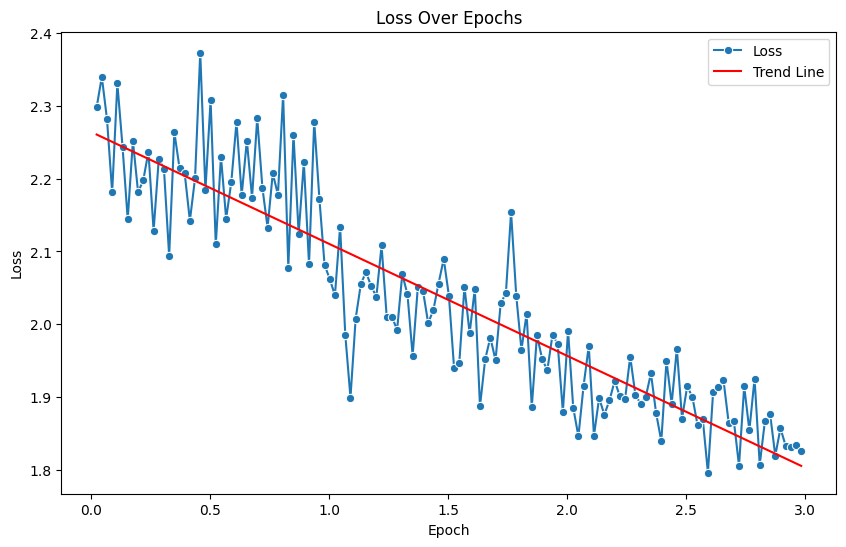

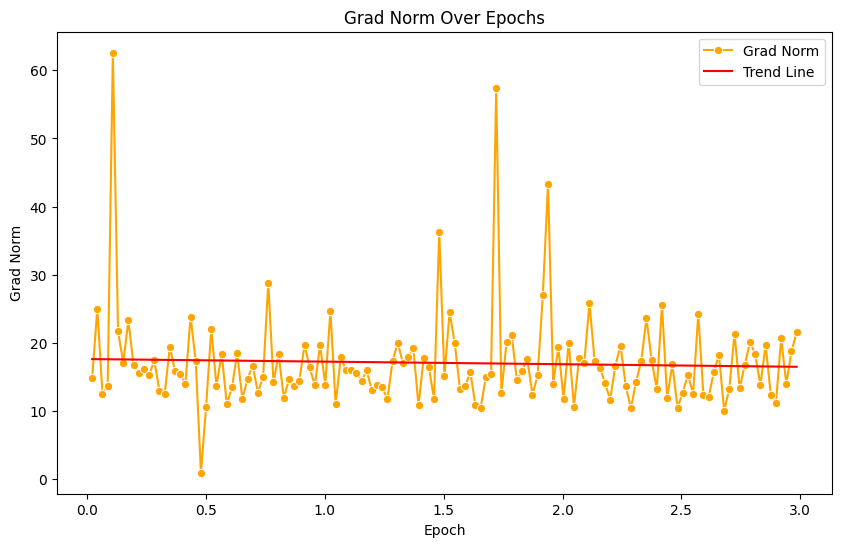

In [11]:
model_save_path = "./huggingface_model"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

# Extract training loss and validation perplexity
training_loss = trainer.state.log_history
print(training_loss)
# Extract loss, grad_norm, and epoch
loss_values = []
grad_norm_values = []
epochs = []

for entry in training_loss:
    if 'loss' in entry and 'grad_norm' in entry and 'epoch' in entry:
        loss_values.append(entry['loss'])
        grad_norm_values.append(entry['grad_norm'])
        epochs.append(entry['epoch'])

# Convert epochs to numpy array for polyfit
epochs_np = np.array(epochs)

# ----- Plot Loss Over Epochs with Trend Line -----
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=loss_values, marker='o', label='Loss')

# Calculate trend line
loss_trend = np.polyfit(epochs_np, loss_values, 1)
loss_trend_line = np.polyval(loss_trend, epochs_np)
plt.plot(epochs_np, loss_trend_line, color='red', label='Trend Line')

plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join('images', "loss_with_trend.png"))
plt.show()

# ----- Plot Grad Norm Over Epochs with Trend Line -----
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=grad_norm_values, marker='o', label='Grad Norm', color='orange')

# Calculate trend line
grad_trend = np.polyfit(epochs_np, grad_norm_values, 1)
grad_trend_line = np.polyval(grad_trend, epochs_np)
plt.plot(epochs_np, grad_trend_line, color='red', label='Trend Line')

plt.title('Grad Norm Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Grad Norm')
plt.legend()
plt.savefig(os.path.join('images', "grad_norm_with_trend.png"))
plt.show()